# Testing Pdot to see if this could be observable with LSST

In [1]:
import numpy as np
from astropy import units
from astropy.table import Table
import pandas as pd

import os

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.5, 'mxns': 2.5, 'beta': 0.125, 'tflag': 1, 'acc2': 1.5, 'remnantflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -1.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 2, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 0, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014}

In [3]:
#testing with diff fprimc factor
#BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.5, 'mxns': 2.5, 'beta': 0.125, 'tflag': 1, 'acc2': 1.5, 'remnantflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -1.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 2, 'eddlimflag' : 0, 'fprimc_array' : [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 0, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014}

In [6]:
%load_ext autoreload
%autoreload 2

from binaryTides import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#choose the relevant initial conditions
m1 = 1 #Msun
m2 = 1 #Msun
porb = 8 #days
ecc = 0.8
tend = 10000 #Myr
Zmet = 0.02

In [8]:
#get initial values for stars from COSMIC
binary = InitialBinaryTable.InitialBinaries(m1=m1, m2=m2, porb=porb, ecc=ecc, tphysf=tend, kstar1=1, kstar2=1, metallicity=Zmet)
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary, BSEDict=BSEDict, dtp=tend/100)
bn = bcm.iloc[0]
bn

/Users/ageller/anaconda3/envs/EBLSST/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)


tphys                   0
kstar_1                 1
mass0_1                 1
mass_1                  1
lum_1            0.628609
rad_1            0.883247
teff_1            5493.18
massc_1                 0
radc_1                  0
menv_1          0.0328902
renv_1           0.230702
epoch_1                 0
omega_spin_1      1058.98
deltam_1                0
RRLO_1           0.549729
kstar_2                 1
mass0_2                 1
mass_2                  1
lum_2            0.628609
rad_2            0.883247
teff_2            5493.18
massc_2                 0
radc_2                  0
menv_2          0.0328902
renv_2           0.230702
epoch_2                 0
omega_spin_2      1058.98
deltam_2                0
RRLO_2           0.549729
porb                    8
sep               21.2009
ecc                   0.8
B_1                     0
B_2                     0
SN_1                    0
SN_2                    0
bin_state               0
merger_type          -001
bin_num     

In [9]:
#try using the default BSE as another comparison (from my downloaded15Apr2021 directory)
initStr =  f'{m1} {m2} {tend} {porb} 1 1 {Zmet} {ecc}\n'
initStr += f'{BSEDict["neta"]} {BSEDict["bwind"]} {BSEDict["hewind"]} {BSEDict["alpha1"]} {BSEDict["lambdaf"]}\n'
initStr += f'{BSEDict["ceflag"]} {BSEDict["tflag"]} {BSEDict["ifflag"]} {BSEDict["wdflag"]} {BSEDict["bhflag"]} 1 {BSEDict["mxns"]} 12345\n'
initStr += f'{BSEDict["pts1"]} {BSEDict["pts2"]} {BSEDict["pts3"]}\n'
initStr += f'{BSEDict["sigma"]} {BSEDict["beta"]} {BSEDict["xi"]} {BSEDict["acc2"]} {BSEDict["epsnov"]} {BSEDict["eddfac"]} {BSEDict["gamma"]}\n'

initFile = open("binary.in", "w")
initFile.write(initStr)
initFile.close()
os.system("./bse")

print(initStr)
#default from BSE (after 1st line)
# 0.5 0.5 10000. 8.0 1 1 0.02 0.8
# 0.5 0.0 1.0 3.0 0.5
# 0 1 0 1 0 1 3.0 29769
# 0.05 0.01 0.02
# 190.0 0.125 1.0 1.5 0.001 10.0 -1.0

df = pd.read_csv('binary.dat', header=None, sep='\s+', 
                 names=['t','k1','k2','m1','m2','mc1','mc2','logR1','logR2','RRL1','RRL2','logL1','logL2','omega1','omega2',
                        'dmt1','dmt2','a','e'])
df.drop(df.tail(2).index,inplace=True)
df

1 1 10000 8 1 1 0.02 0.8
0.5 0.0 0.5 1.0 0.5
0 1 0 1 1 1 2.5 12345
0.001 0.01 0.02
265.0 0.125 1.0 1.5 0.001 1.0 -1.0



,t,k1,k2,m1,m2,mc1,mc2,logR1,logR2,RRL1,RRL2,logL1,logL2,omega1,omega2,dmt1,dmt2,a,e
0,0.0000,1,1,1.0,1.0,0.0,0.0,-0.0515,-0.0515,0.1106,0.1106,-0.1563,-0.1563,1053.0,1053.0,0.0,0.0,21.200,0.800
1,11.0031,1,1,1.0,1.0,0.0,0.0,-0.0514,-0.0514,0.1134,0.1134,-0.1561,-0.1561,1401.0,1401.0,0.0,0.0,20.670,0.795
2,22.0063,1,1,1.0,1.0,0.0,0.0,-0.0513,-0.0513,0.1147,0.1147,-0.1558,-0.1558,1547.0,1547.0,0.0,0.0,20.440,0.792
3,33.0094,1,1,1.0,1.0,0.0,0.0,-0.0512,-0.0512,0.1157,0.1157,-0.1556,-0.1556,1652.0,1652.0,0.0,0.0,20.270,0.791
4,44.0125,1,1,1.0,1.0,0.0,0.0,-0.0511,-0.0511,0.1165,0.1165,-0.1554,-0.1554,1735.0,1735.0,0.0,0.0,20.130,0.789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,9994.9541,1,1,1.0,1.0,0.0,0.0,0.1352,0.1352,0.5898,0.5898,0.2496,0.2496,1848.0,1848.0,0.0,0.0,6.109,0.000
1521,9996.3311,1,1,1.0,1.0,0.0,0.0,0.1353,0.1353,0.5899,0.5899,0.2497,0.2497,1849.0,1849.0,0.0,0.0,6.109,0.000
1522,9997.7051,1,1,1.0,1.0,0.0,0.0,0.1354,0.1354,0.5901,0.5901,0.2498,0.2498,1849.0,1849.0,0.0,0.0,6.108,0.000
1523,9999.0781,1,1,1.0,1.0,0.0,0.0,0.1355,0.1355,0.5903,0.5903,0.2499,0.2499,1849.0,1849.0,0.0,0.0,6.108,0.000


In [25]:
#my code
#I am trying to add in the evolution from cosmic as a check
b = InitialBinaryTable.InitialBinaries(m1=m1, m2=m2, porb=1e10, ecc=0, tphysf=tend, kstar1=1, kstar2=1, metallicity=Zmet)
bppIn, bcmIn, initC, kick_info = Evolve.evolve(initialbinarytable=b, BSEDict=BSEDict, dtp=tend/100)
binary = initBinary(bcm = Table.from_pandas(bcmIn),
                    p = bn['porb']*units.day, 
                    e = bn['ecc'])

# binary = initBinary(m1 = bn['mass_1']*units.solMass,
#                     m2 = bn['mass_2']*units.solMass,
#                     m1e = bn['menv_1']*units.solMass,
#                     m2e = bn['menv_2']*units.solMass,
#                     m1c = bn['massc_1']*units.solMass,
#                     m2c = bn['massc_2']*units.solMass,
#                     r1 = bn['rad_1']*units.solRad,
#                     r2 = bn['rad_2']*units.solRad,
#                     r1e = bn['renv_1']*units.solRad,
#                     r2e = bn['renv_2']*units.solRad,
#                     r1c = bn['radc_1']*units.solRad,
#                     r2c = bn['radc_2']*units.solRad,
#                     omega1 = bn['omega_spin_1']*units.yr**-1,
#                     omega2 = bn['omega_spin_2']*units.yr**-1,
#                     L1 = bn['lum_1']*units.solLum,
#                     L2 = bn['lum_2']*units.solLum,
#                     p = bn['porb']*units.day, 
#                     e = bn['ecc'])
integrator = TidesIntegrator(binary)
integrator.evolve(tend*units.Myr)

/Users/ageller/anaconda3/envs/EBLSST/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)


binary semi-major axis =  0.09862894142866485 AU
binary omega1 =  1058.9837892769335 1 / yr 1058.9837892769335


In [26]:
integrator.result

tphys,ecc,sma,porb,omega1,omega2
yr,,solRad,yr,1 / yr,1 / yr
float64,float64,float64,float64,float64,float64
0.0,0.8,21.208393886909985,0.02190280629705676,1058.9837892769335,1058.9837892769335
2481632.69269176,0.799,21.104127143064844,0.02174148396002521,1127.4212589593762,1127.4212589593762
5445086.95020072,0.798,21.000976793484348,0.021582280566741514,1195.3329198245299,1195.3329198245299
8936595.867866646,0.797,20.89892937917343,0.021425163712362253,1262.69918314938,1262.69918314938
13003257.185529662,0.796,20.797971832198346,0.021270101874654404,1329.4996405434142,1329.4996405434142
17693031.688737836,0.795,20.69809147079991,0.02111706439607807,1395.7130351078713,1395.7130351078713
23054734.032867007,0.794,20.599275994582236,0.02096602146628251,1461.3172331928702,1461.3172331928702
29138014.97976706,0.793,20.501513479718948,0.020816944104919393,1526.2891971318677,1526.2891971318677


(2829.674559981138, 3572.4641319761863)

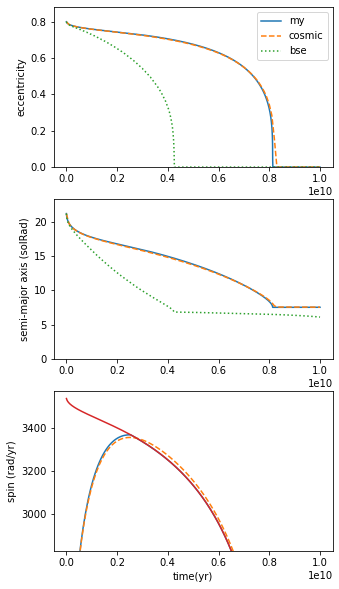

In [27]:
#my integrator
t = integrator.result['tphys'].to(units.yr).value
e = integrator.result['ecc'].data
a = integrator.result['sma'].to(units.solRad).value
p = integrator.result['porb'].to(units.yr).value
o1 = integrator.result['omega1'].to(1./units.yr).value
o2 = integrator.result['omega2'].to(1./units.yr).value

#cosmic
tc = bcm['tphys'].values
ac = bcm['sep'].values
ec = bcm['ecc'].values
o1c = bcm['omega_spin_1'].values
o2c = bcm['omega_spin_2'].values

#bse
tb = df['t'].values
ab = df['a'].values
eb = df['e'].values
o1b = df['omega1'].values
o2b = df['omega2'].values

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

f, ax = plt.subplots(3,1, figsize=(5,10))

ax[0].plot(t, e, label='my')
ax[0].plot(tc*1e6,ec,linestyle='dashed', label='cosmic')
ax[0].plot(tb*1e6,eb,linestyle='dotted', label='bse')
ax[0].set_ylabel('eccentricity')
ax[0].set_ylim(0,1.1*max(e))
ax[0].legend()

ax[1].plot(t, a)
ax[1].plot(tc*1e6,ac,linestyle='dashed')
ax[1].plot(tb*1e6,ab,linestyle='dotted')
ax[1].set_ylabel('semi-major axis (solRad)')
ax[1].set_ylim(0,1.1*max(a))

ax[2].plot(t,o1)#, c=colors[0])
ax[2].plot(tc*1e6,o1c, linestyle='dashed')#, c=colors[0])
ax[2].plot(tb*1e6,o1b, linestyle='dotted')#, c=colors[0])
#ax[2].plot(tc*1e6,o2c, linestyle='dashed', c=colors[1])
#ax[2].plot(t,o2, c=colors[1])
ax[2].set_ylabel('spin (rad/yr)')
ax[2].set_xlabel('time(yr)')

f2 = 1. + 15./2.*e**2. +  45./8.*e**4. +   5./16.*e**6.
f5 = 1. +     3.*e**2. +   3./8.*e**4.
omega_orb = 2.*np.pi/p
omega_eq = f2*omega_orb/(f5*(1. - e**2.)**(3./2.))
ax[2].plot(t[1:],omega_eq[:-1])#, c=colors[2])

ym = max(np.concatenate((o1c,o1b,o1,omega_eq)))
ax[2].set_ylim(0,1.01*ym)
ax[2].set_ylim(0.8*ym,1.01*ym)

#ax[2].set_ylim(0,1.01*max(spin_eq))
#ax[2].set_ylim(0,1.01*max(o1))
